# <center><span style='color:Blue'>Telecom Churn - Case Study</span></center>

# 1. Introduction

##  1.1 Business Description

- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another.

## 1.2 Problem Statement

- In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. 
- It is very important for any telecom operator to prevent the present customers from churning to other operators.
- In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition to reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

## 1.3 Objective of the Project

- The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:
    - to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.
    - to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
    -  Recommend strategies to manage customer churn based on your observations.
    - Use a dimensionality reduction technique such as PCA to handle large number of attributes and then build a predictive model

## 1.4 Approach to solve this business problem

- Step 1 : Introduction -  Business Description, Problem Statement and Objective of the Project
- Step 2 : Data Understanding and Data Preparation
- Step 3 : Exploratory data analysis (EDA)
- Step 4 : Training the model
- Step 5 : Model Prediction and Evaluation
- Step 6 : Recommandations

# Step 2 : Data Understanding and Data Preparation

## 2.1 Importing Libraries and Packages

In [1]:
import pandas as pd #Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings
from IPython.display import Markdown, display ,HTML

## 2.2 Data Loading : Train Data Set

In [2]:
df_telecom_train = pd.read_csv("train.csv")#reading the CSV file as dataframe
df_telecom_train.head() #diplaying the 1st few rows of the dataset

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


## 2.3. Data Description : Train Data Set

In [3]:
#Finding the number of rows and columns in the data
df_telecom_train.shape

(69999, 172)

##### Observations : There are 69999 Rows & 172 Columns in the Train Dataset.

In [4]:
#Fetching the information that we can get from the dataset
df_telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
#Describing the data in terms of range
df_telecom_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


## 2.4 Data Loading : Test Data Set

In [6]:
df_telecom_test = pd.read_csv("test.csv")#reading the CSV file as dataframe
df_telecom_test.head() #diplaying the 1st few rows of the dataset

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


## 2.5. Data Description : Test Data Set

In [7]:
#Finding the number of rows and columns in the data
df_telecom_test.shape

(30000, 171)

##### Observations : There are 30000 Rows & 171 Columns in the Train Dataset.

In [8]:
#Fetching the information that we can get from the dataset
df_telecom_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [9]:
#Describing the data in terms of range
df_telecom_test.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,92.907500,87.504750,84.180500,7.280000,6.660000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,198.227500,191.775000,191.690500,34.760000,32.550000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,371.969250,365.250750,367.804750,117.170000,115.210000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,109.0,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


## 2.6 Data Preparation

**We are assuming that there are three phases of customer lifecycle :**
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

In this case, we are working over a four-month window, the first two months are the **good** phase, the third month is the **action** phase, while the fourth month is the **churn** phase.

### Lets **DERIVE NEW COLUMNS** based on few observations

In [10]:
#Extracting list of columns containing recharge amount
recharge_columns =  df_telecom_train.columns[df_telecom_train.columns.str.contains('rech_amt|rech_data')]
print(recharge_columns,"\n")
print("The are in total",len(recharge_columns),"Columns containing Recharge Amount")

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object') 

The are in total 18 Columns containing Recharge Amount


In [11]:
#Checking missing values percentages
telecom_df_null_check = 100*df_telecom_train.loc[:,recharge_columns].isnull().sum()/len(df_telecom_train)
telecom_df_null_check = telecom_df_null_check.round(decimals = 2)
telecom_df_null_check

total_rech_amt_6             0.00
total_rech_amt_7             0.00
total_rech_amt_8             0.00
max_rech_amt_6               0.00
max_rech_amt_7               0.00
max_rech_amt_8               0.00
date_of_last_rech_data_6    74.90
date_of_last_rech_data_7    74.48
date_of_last_rech_data_8    73.69
total_rech_data_6           74.90
total_rech_data_7           74.48
total_rech_data_8           73.69
max_rech_data_6             74.90
max_rech_data_7             74.48
max_rech_data_8             73.69
av_rech_amt_data_6          74.90
av_rech_amt_data_7          74.48
av_rech_amt_data_8          73.69
dtype: float64

##### Observations : For most of the columns more then `74%` values for **recharge** related data are missing.

In [12]:
#Replacing the NAN values with 0, considering there were no recharges done by the customer.
df_telecom_train['total_rech_data_6'] = df_telecom_train['total_rech_data_6'].replace(np.NaN,0.0)
df_telecom_train['total_rech_data_7'] = df_telecom_train['total_rech_data_7'].replace(np.NaN,0.0)
df_telecom_train['total_rech_data_8'] = df_telecom_train['total_rech_data_8'].replace(np.NaN,0.0)
df_telecom_train['av_rech_amt_data_6'] = df_telecom_train['av_rech_amt_data_6'].replace(np.NaN,0.0)
df_telecom_train['av_rech_amt_data_7'] = df_telecom_train['av_rech_amt_data_7'].replace(np.NaN,0.0)
df_telecom_train['av_rech_amt_data_8'] = df_telecom_train['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [13]:
#let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
df_telecom_train['total_rech_amt_data_6'] = df_telecom_train.av_rech_amt_data_6 + df_telecom_train.total_rech_data_6
df_telecom_train['total_rech_amt_data_7'] = df_telecom_train.av_rech_amt_data_7 + df_telecom_train.total_rech_data_7
df_telecom_train['total_rech_amt_data_8'] = df_telecom_train.av_rech_amt_data_8 + df_telecom_train.total_rech_data_8

In [14]:
#Defining total average recharge amount for good phase for months 6 and 7 (the good phase)
df_telecom_train['total_avg_rech_amnt_6_7_GPhase'] = (df_telecom_train.total_rech_amt_6 + df_telecom_train.total_rech_amt_data_6+ df_telecom_train.total_rech_amt_7+ df_telecom_train.total_rech_amt_data_7)/2

### Lets FILTER HIGH VALUED CUSTOMERS based on few observations

- **Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)**

In [15]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = df_telecom_train.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)
print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_filter),"\n")

telecom_df_high_val_cust = df_telecom_train[df_telecom_train.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
print('Dataframe Shape after Filtering High Value Customers: ' + str(telecom_df_high_val_cust.shape),"\n")

70 percentile of 6th and 7th months avg recharge amount: 432.5 

Dataframe Shape after Filtering High Value Customers: (20984, 176) 



### Tag churners and remove attributes of the churn phase

- Now tagging the churned customers (churn = 1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
- The attributes we need to use to tag churners are:
    - total_ic_mou_8
    - total_og_mou_8
    - vol_2g_mb_8
    - vol_3g_mb_8
- After tagging churners, we will remove all the attributes corresponding to the churn phase (all attributes having ‘ _8’, etc. in their names).

In [16]:
#taking all the mentioned columns in a dataframe
high_val_cust_8 = ['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8','vol_3g_mb_8']

In [17]:
# Checking the NA/Null values are present or Not
df = 100*telecom_df_high_val_cust.loc[:,high_val_cust_8].isnull().sum()/len(telecom_df_high_val_cust)
df

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [18]:
# Initially set all the values as 0
telecom_df_high_val_cust['churn']= 0

In [19]:
#is_churned boolean flag for customers where above values are zero
is_churned = (telecom_df_high_val_cust.total_ic_mou_8 == 0) & \
             (telecom_df_high_val_cust.total_og_mou_8 == 0) & \
             (telecom_df_high_val_cust.vol_2g_mb_8 ==0) & \
             (telecom_df_high_val_cust.vol_3g_mb_8 ==0)
# set all which having is_churned True condition as 1
telecom_df_high_val_cust.loc[is_churned,'churn']=1

In [20]:
# let us check what's the % of churned customers
print("The Percentage of Churned Customers are",round(100*telecom_df_high_val_cust.churn.sum()/len(telecom_df_high_val_cust),2),"%")

The Percentage of Churned Customers are 5.47 %


In [21]:
telecom_df_high_val_cust

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
12,12,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,439.919,397.946,...,322,0.00,0.00,0.00,0,0.0,0.0,0.0,469.5,0
15,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,...,602,0.00,0.00,0.00,0,155.0,0.0,155.0,604.5,0
23,23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,...,455,0.00,0.00,0.00,0,0.0,0.0,0.0,1205.0,0
24,24,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,371.974,352.069,...,1219,0.00,0.00,0.00,0,24.0,48.0,24.0,469.5,0
27,27,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,390.489,350.985,...,573,700.40,185.71,173.72,0,209.0,306.0,217.0,826.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,69982,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,146.927,458.054,...,1577,0.00,0.00,0.00,0,0.0,276.0,0.0,449.0,0
69984,69984,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1106.130,1609.381,...,283,6.48,102.80,127.41,0,452.0,0.0,0.0,1624.0,0
69989,69989,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,196.695,298.645,...,251,107.77,112.70,242.18,0,101.0,234.0,92.0,483.5,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,879,0.00,0.00,0.00,0,0.0,0.0,0.0,438.0,0


# Step 3 : Exploratory data analysis (EDA)

### Lets look and drop for columns with only 1/2 unique values which would not add any value to our model 

In [22]:
for i in telecom_df_high_val_cust.columns :
    if len(pd.unique(telecom_df_high_val_cust[i])) == 2:
        print(i," - ",len(pd.unique(telecom_df_high_val_cust[i])))

loc_og_t2o_mou  -  2
std_og_t2o_mou  -  2
loc_ic_t2o_mou  -  2
last_date_of_month_7  -  2
last_date_of_month_8  -  2
std_og_t2c_mou_6  -  2
std_og_t2c_mou_7  -  2
std_og_t2c_mou_8  -  2
std_ic_t2o_mou_6  -  2
std_ic_t2o_mou_7  -  2
std_ic_t2o_mou_8  -  2
churn_probability  -  2
churn  -  2


In [23]:
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7',
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7']

In [24]:
print("Features before dropping unique values : "+ str(telecom_df_high_val_cust.shape[1]))
telecom_df_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)
print("Features after dropping unique values : "+ str(telecom_df_high_val_cust.shape[1]))

Features before dropping unique values : 177
Features after dropping unique values : 167


### Lets look for Object Type Features

In [25]:
df_DateCols = []
for i in telecom_df_high_val_cust.columns :
    if telecom_df_high_val_cust[i].dtypes == 'object':
        print(i," - ",telecom_df_high_val_cust[i].dtypes)
        df_DateCols.append(i)
df_DateCols

last_date_of_month_8  -  object
date_of_last_rech_6  -  object
date_of_last_rech_7  -  object
date_of_last_rech_8  -  object
date_of_last_rech_data_6  -  object
date_of_last_rech_data_7  -  object
date_of_last_rech_data_8  -  object


['last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [26]:
#Since all the Object Type Columns are of DateType , lets convert them to Date Type
for col in df_DateCols:
    telecom_df_high_val_cust[col] = pd.to_datetime(telecom_df_high_val_cust[col])

### Observe Features with Graghs and Charts

In [27]:
# create box plot function for  6th, 7th and 8th month variables
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_df_high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

## 1. Recharge amount related Features

In [28]:
#Lets extract the columns containing recharge amount in their variable name
recharge_amnt_columns =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

### 1.1 Box Plot - total_rech_amt

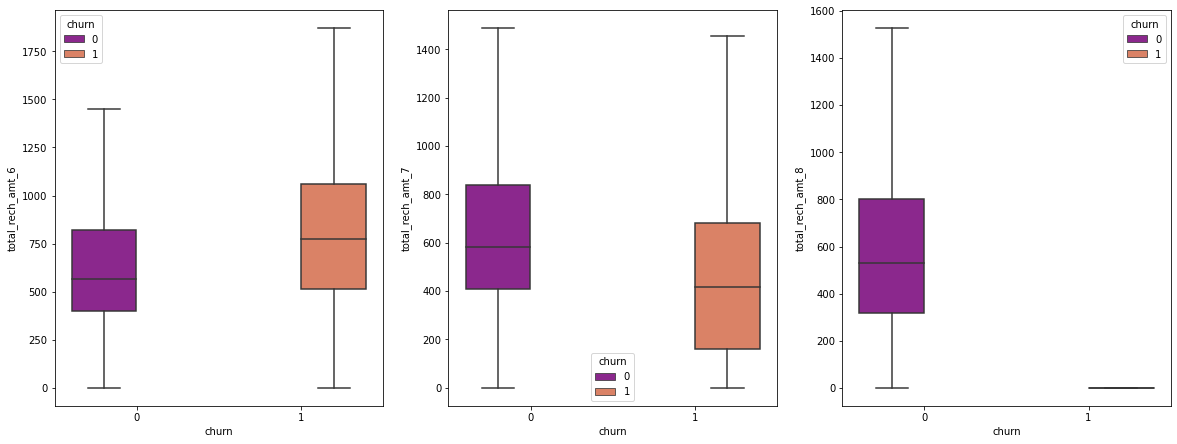

In [29]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

##### Observations : We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

### 1.2 Box Plot - total_rech_amt_data

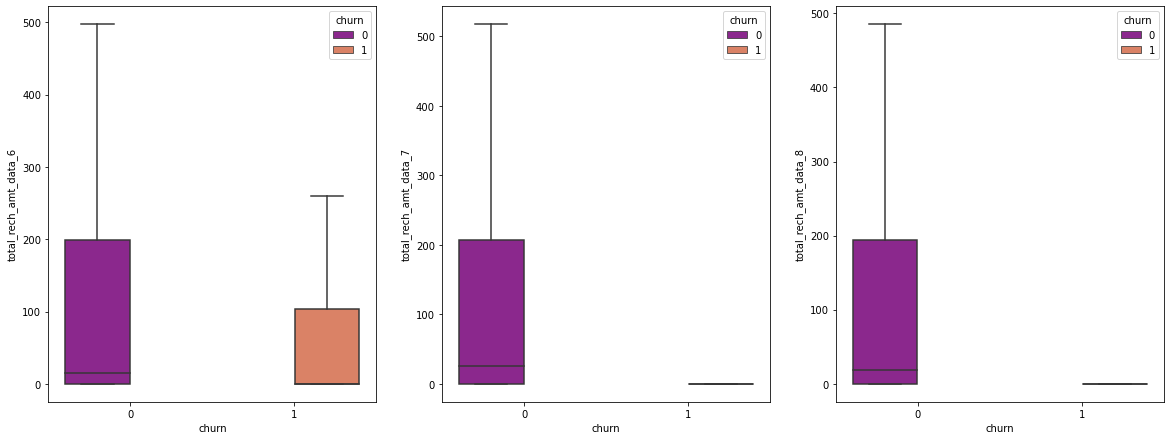

In [30]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

### 1.3 Box Plot - max_rech_amt

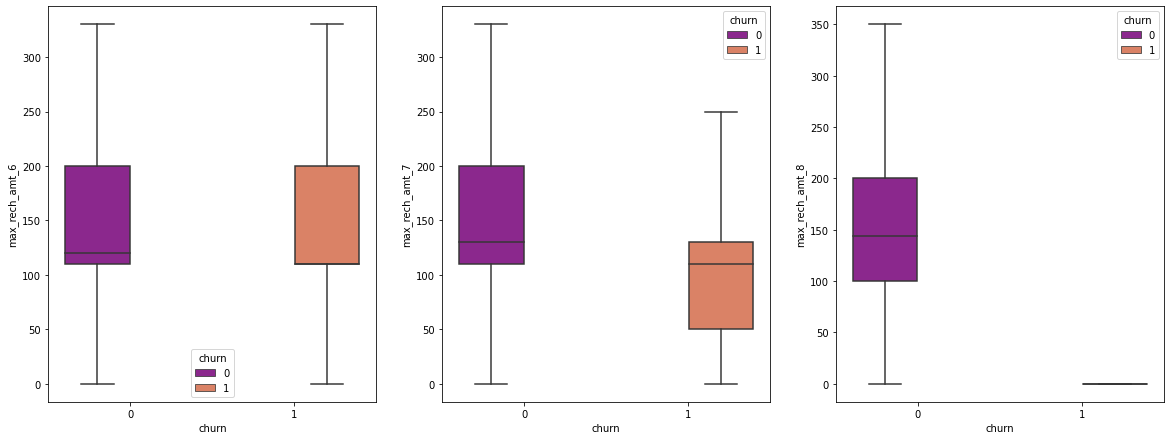

In [31]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

##### Observations : We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [32]:
#Some other recharge related variables:
other_recharge = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [33]:
# lets check the percentage of Null values for other recharge related variables
100*telecom_df_high_val_cust.loc[:,other_recharge].isnull().sum()/len(telecom_df_high_val_cust)


total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     50.443195
max_rech_data_7     49.428136
max_rech_data_8     51.725124
dtype: float64

### 1.4 Box Plot - total_rech_num

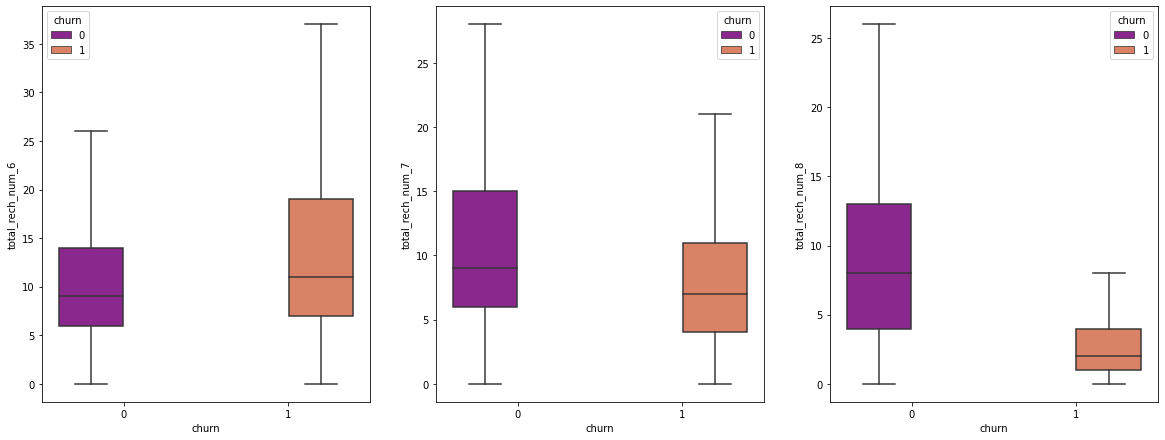

In [34]:
#Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

##### Observations : We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

In [35]:
#Replace null values of max_rech_data with 0
telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = telecom_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [36]:
100*telecom_df_high_val_cust.loc[:,other_recharge].isnull().sum()/len(telecom_df_high_val_cust)

total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
max_rech_data_6     0.0
max_rech_data_7     0.0
max_rech_data_8     0.0
dtype: float64

### 1.5 Box Plot - max_rech_data

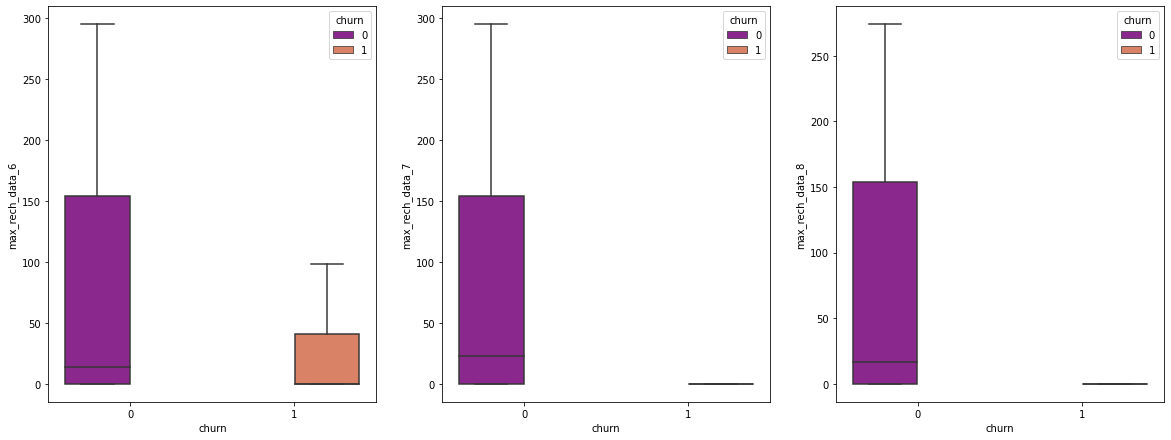

In [37]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

##### Observations : We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

In [38]:
#Extracting the last day recharge amount columns
last_day_rech_amt = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('day')]
print(last_day_rech_amt)

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'], dtype='object')


### 1.5 Box Plot - last_day_rch_amt

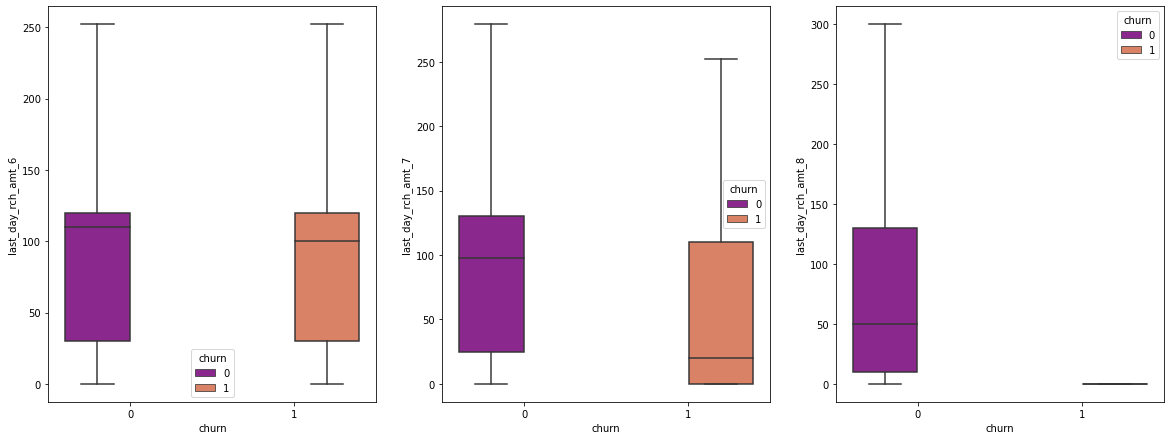

In [39]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

##### Observations : We are getting a huge drop in 8th month recharge amount for churned customers.

## 2. 2G and 3G usage related Features

In [40]:
usage_2g_and_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

##### Observations : We are getting more then 40% values are not available for count of recharge and average revenue for 2G/3G per user.

In [41]:
#Lets drop the columns with more than 49% data as null
telecom_df_high_val_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_3g_6','count_rech_3g_7',
            'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [42]:
telecom_df_high_val_cust.shape

(20984, 157)

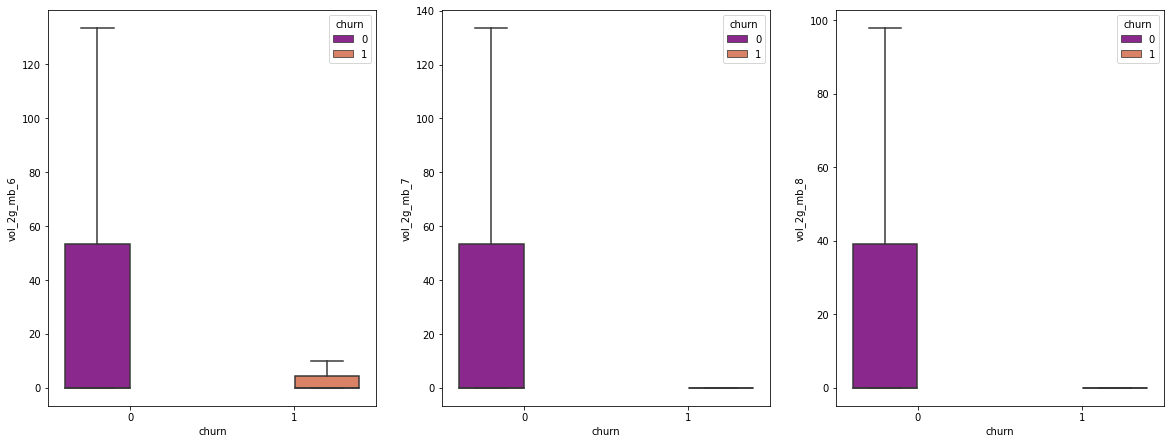

In [43]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

### 2.1 Box Plot - vol_2g_mb

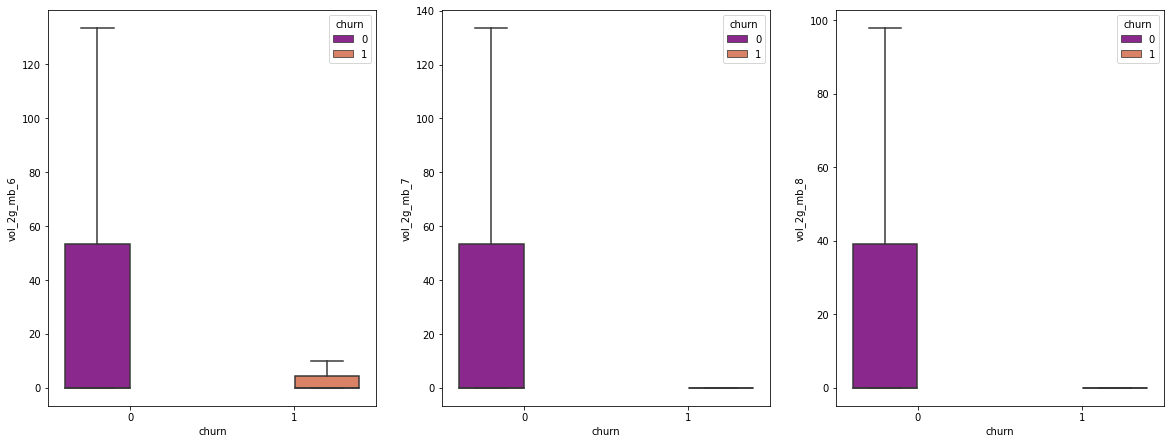

In [44]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

### 2.2 Box Plot - vol_3g_mb

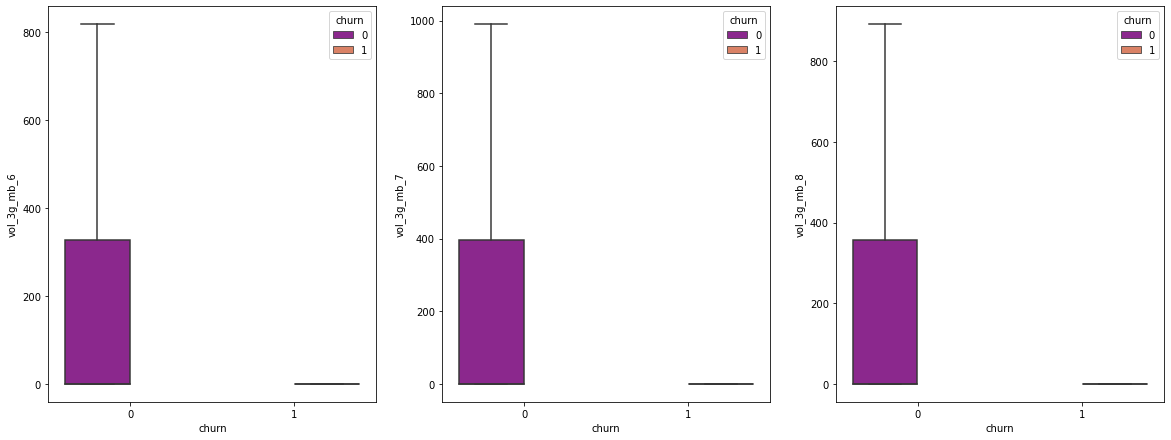

In [45]:
plot_box_chart('vol_3g_mb')

##### Observations : We have two observations from above:
- 2G and 3G usage for churned customers drops in 8th month
- We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

In [46]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [47]:
#Checking Null value
100*telecom_df_high_val_cust.loc[:,monthly_subcription_2g_3g].isnull().sum()/len(telecom_df_high_val_cust.loc[:,monthly_subcription_2g_3g])

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

In [48]:
telecom_df_high_val_cust[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20984 entries, 12 to 69997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  20984 non-null  int64
 1   monthly_2g_7  20984 non-null  int64
 2   monthly_2g_8  20984 non-null  int64
 3   monthly_3g_6  20984 non-null  int64
 4   monthly_3g_7  20984 non-null  int64
 5   monthly_3g_8  20984 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


### 2.3 Box Plot - monthly_2g

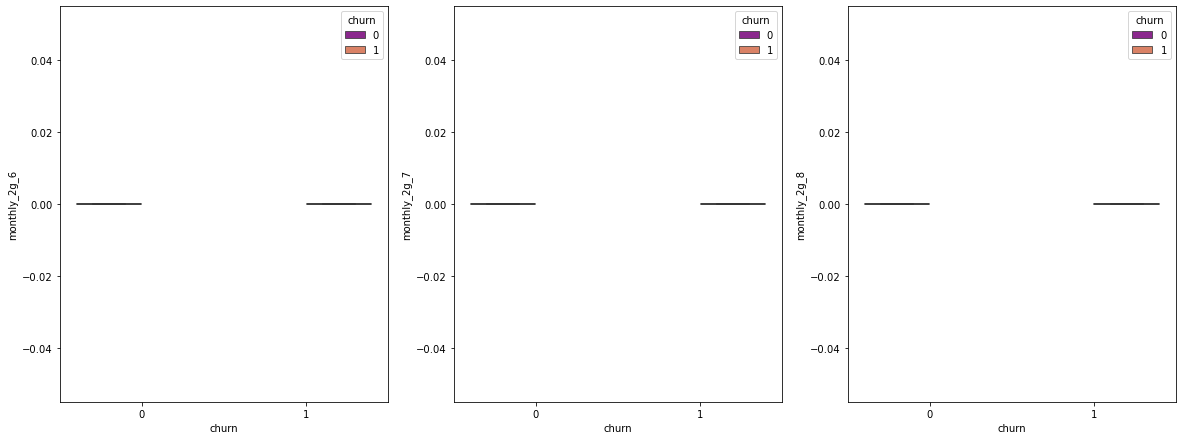

In [49]:
# Ploting for monthly subscription :
plot_box_chart('monthly_2g')

##### Observations : Value range is very low, hence graph is not giving us proper justification result .Hence doing analysis by checking mean value.

In [50]:
#Plotting Bar Chart
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

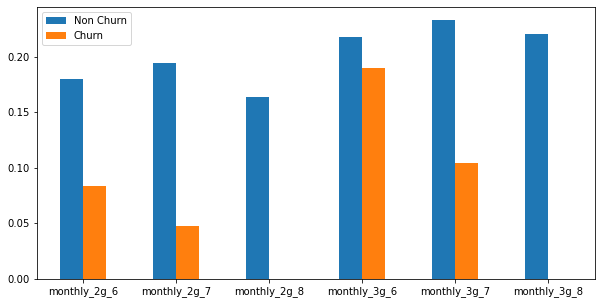

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.179916,0.194334,0.164087,0.218077,0.232898,0.220699
Churn,0.083697,0.047951,0.000000,0.190061,0.104621,0.000000


In [51]:
#Plotting monthly 2g and 3g
plot_mean_bar_chart(telecom_df_high_val_cust, monthly_subcription_2g_3g)

##### Observations : Again we can see a drop in monthly subscription for churned customers in 8th Month.

## 3. Volume based cost usage related Features

In [52]:
vbc_column = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [53]:
# Renaming month named vbc columns to 6,7,8 format
telecom_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

In [54]:
vbc_column = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

### 3.1 Box Plot - vbc_3g

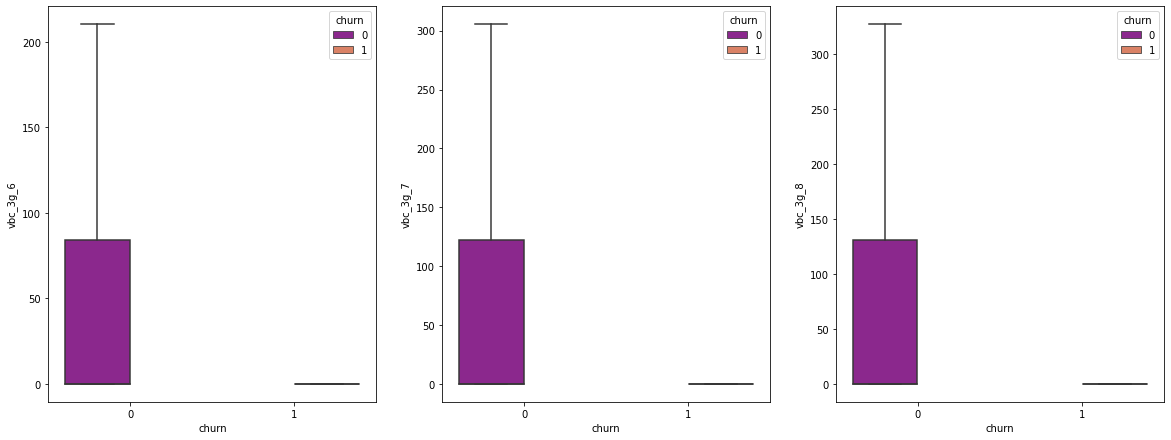

In [55]:
# Ploting for volume based cost :
plot_box_chart('vbc_3g')

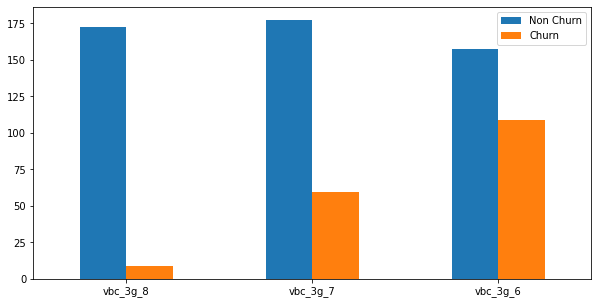

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,172.612398,177.300444,157.238009
Churn,8.649189,59.741421,108.796513


In [56]:
plot_mean_bar_chart(telecom_df_high_val_cust, vbc_column)

##### Observations : Significantly it showing that volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in 8th month

In [57]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]


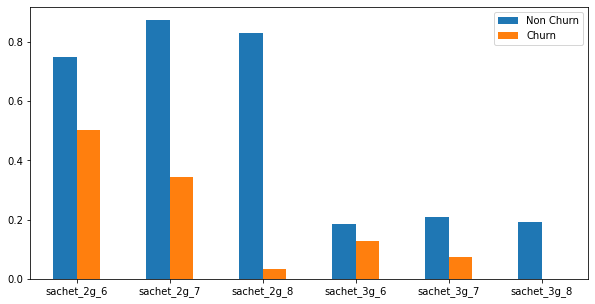

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,0.75087,0.874326,0.829611,0.187075,0.207693,0.191511
Churn,0.50218,0.345248,0.034002,0.126417,0.074978,0.000000


In [58]:
plot_mean_bar_chart(telecom_df_high_val_cust, SC_2g_or_3g_col)

##### Observations : We can see the drop in sachet services in 8th month for churned cutsomers

## 4. Average Revenue Per User  related Features

In [59]:
# Checking columns for average revenue per user
arpu_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('arpu_')]

### 4.1 Box Plot - vbc_3g

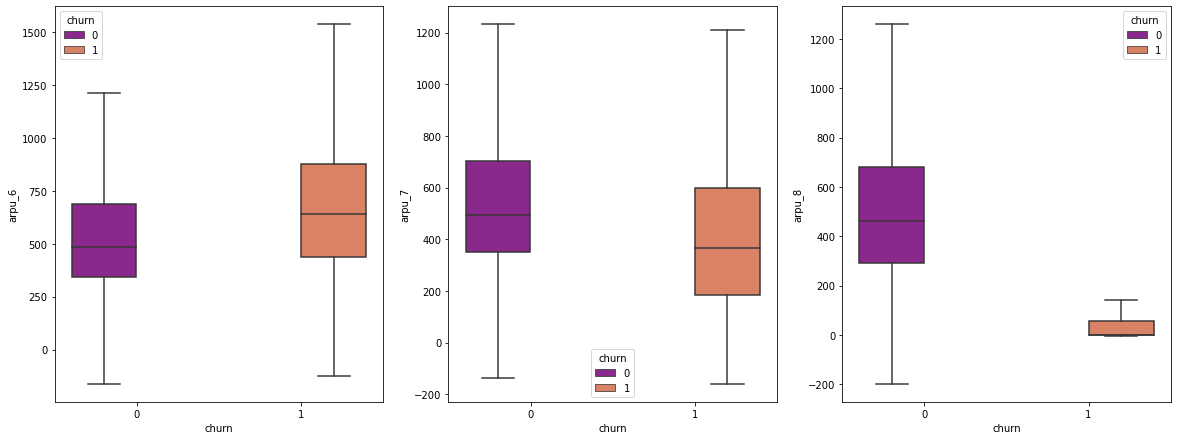

In [60]:
# Plotting arpu
plot_box_chart('arpu')

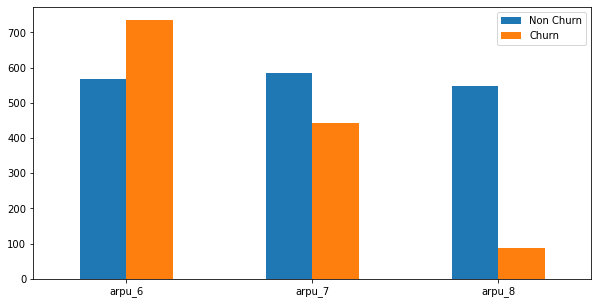

,arpu_6,arpu_7,arpu_8
Non Churn,567.250089,584.317433,548.193665
Churn,735.166869,441.618135,86.896745


In [61]:
plot_mean_bar_chart(telecom_df_high_val_cust, arpu_cols)

##### Observations : We can see that huge drops for Arpu in 8th month for churned customers

## 5. Minutes of usage - voice calls  related Features

In [62]:
mou_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('mou')]

In [63]:
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mo

##### Observations : So for all minutes of usage columns the maximum missing % is 3.91 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [64]:
# replaceing null values by 0 for minutes of usage variables
telecom_df_high_val_cust.loc[:,mou_cols] = telecom_df_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)

In [65]:
mou_og_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [66]:
telecom_df_high_val_cust.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000
mean,28.558768,88.412276,170.866712,6.647443,1.549121,265.934996,177.757522,192.617813,1.894971,372.274326,2.383451,5.842503,647.098117
std,121.136006,233.410894,249.214341,20.571314,6.563695,380.845586,411.211260,412.078561,12.622126,612.028902,53.090602,19.016429,682.983177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.137500,24.380000,0.000000,0.000000,41.290000,0.000000,0.000000,0.000000,1.750000,0.000000,0.000000,176.330000
50%,0.000000,28.040000,86.960000,0.260000,0.000000,140.875000,6.020000,24.200000,0.000000,73.010000,0.000000,0.160000,464.255000
75%,0.000000,83.132500,221.032500,4.765000,0.000000,350.777500,140.250000,182.682500,0.000000,535.937500,0.000000,5.015000,885.795000
max,3775.110000,6431.330000,4696.830000,617.580000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


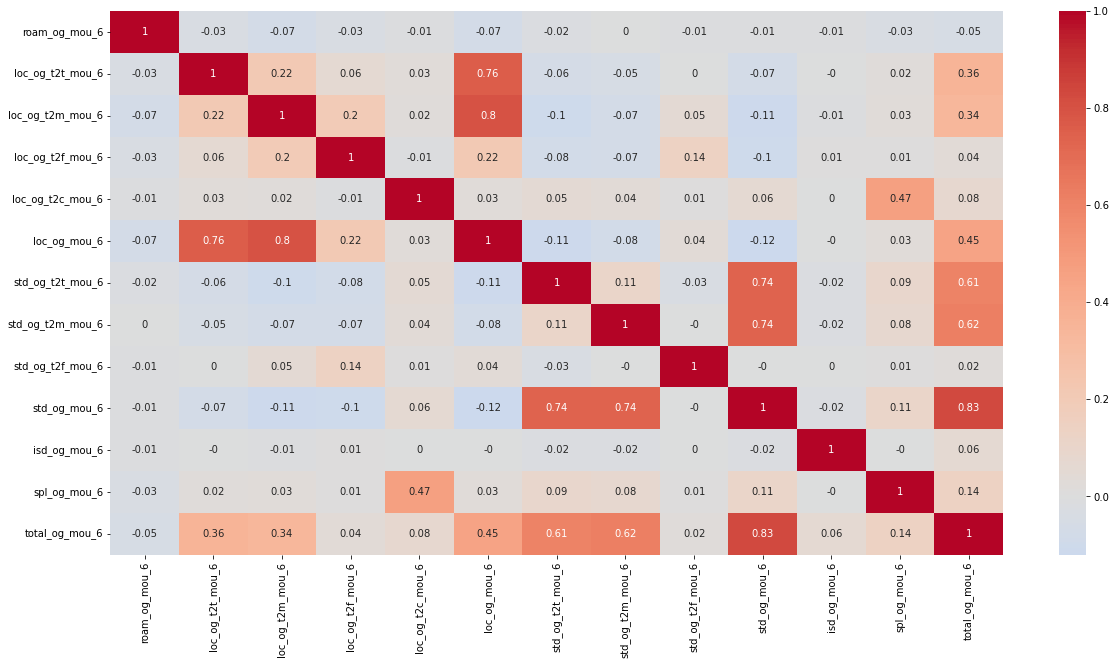

In [67]:
#Checking the corelation
plt.subplots(figsize = (20,10))
#Plotting heatmap of numerical features
sns.heatmap(round(telecom_df_high_val_cust.filter(mou_og_cols6).corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [68]:
#lets drop columns with total_og_mou|std_og_mou|loc_og_mou
list_total_og_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)
list_total_og_cols.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [69]:
telecom_df_high_val_cust.shape

(20984, 148)

In [70]:
#Checking for incoming mou variables
mou_ic_cols6 = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [71]:
telecom_df_high_val_cust.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.00000,20984.000000,20984.000000,20984.000000,20984.000000
mean,16.611307,66.864156,153.497267,15.755854,236.127060,15.217241,30.273796,2.91167,48.406447,296.683751,0.063772,10.848323
std,77.514092,158.017983,215.644988,45.059876,309.688761,70.835910,95.300274,21.05211,131.480014,357.918139,0.200656,76.904438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.090000,30.660000,0.000000,51.960000,0.000000,0.030000,0.00000,1.600000,80.690000,0.000000,0.000000
50%,0.000000,26.560000,88.225000,2.030000,142.190000,0.630000,5.830000,0.00000,12.885000,194.100000,0.000000,0.000000
75%,0.000000,70.040000,194.345000,12.710000,305.220000,9.195000,25.390000,0.20000,43.980000,381.832500,0.000000,0.000000
max,2613.310000,4363.960000,4450.740000,1373.090000,7454.630000,3038.340000,3613.980000,1351.11000,3929.240000,7716.140000,19.760000,6789.410000


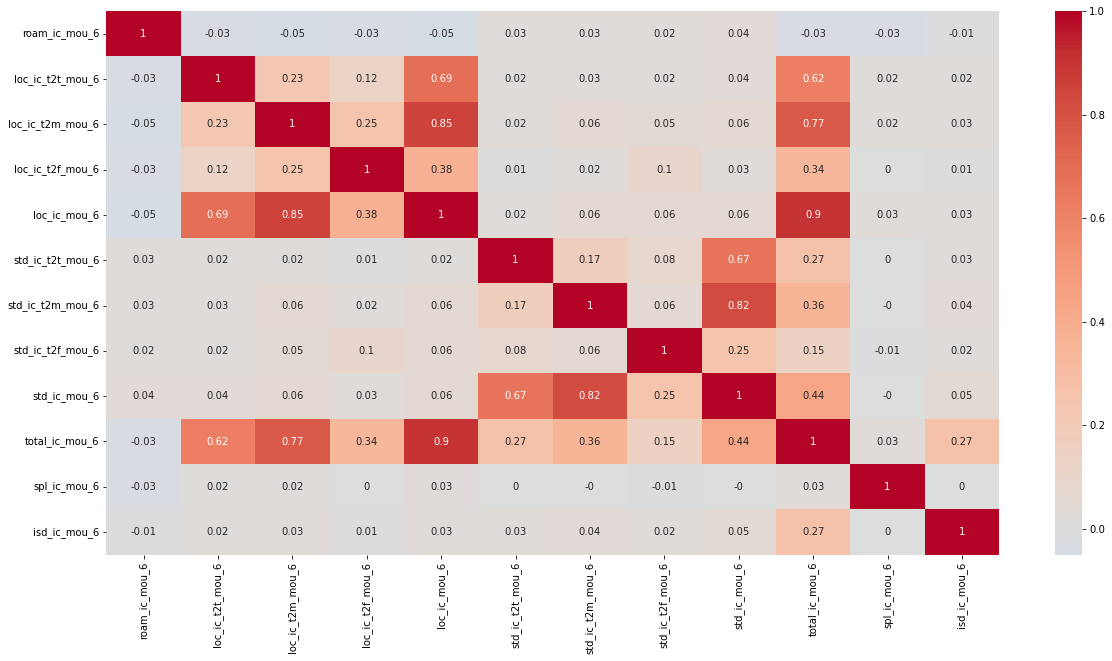

In [72]:
#Checking the corelation
plt.subplots(figsize = (20,10))
#Plotting heatmap of numerical features
sns.heatmap(round(telecom_df_high_val_cust.filter(mou_ic_cols6).corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

##### Observations : We can see that total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [73]:
#lets drop columns with total_ic_mou|std_ic_mou|loc_ic_mou
list_total_ic_cols = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
telecom_df_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
list_total_ic_cols.tolist()

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [74]:
telecom_df_high_val_cust.shape

(20984, 139)

## 6. Offnet Usage related Features

In [75]:
offnet_usage_service_col = telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

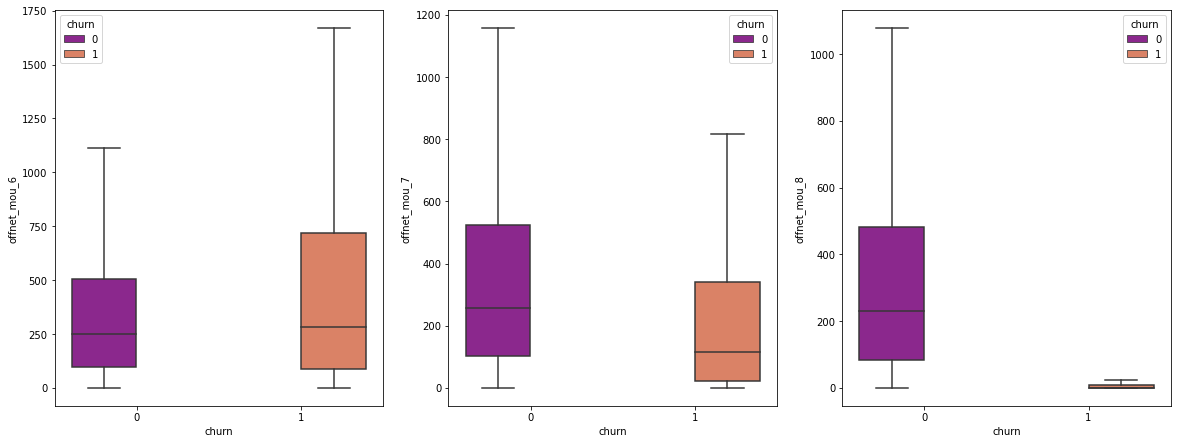

In [76]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

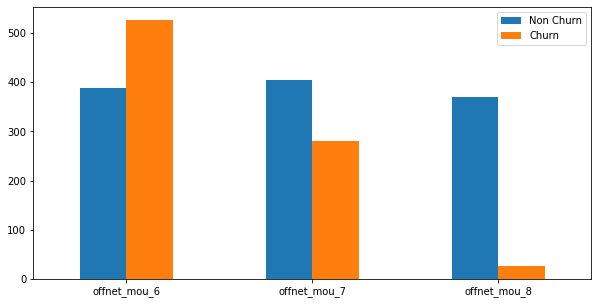

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,388.609858,404.815650,371.048317
Churn,526.734603,279.916975,25.760453


In [77]:
plot_mean_bar_chart(telecom_df_high_val_cust, offnet_usage_service_col)

##### Observations : We can see the drop for offnet mou services in the 8th month

## 7. ONNET : All kind of calls within the same operator network

In [78]:
#minutes of usage related columns
onnet_usage_service =  telecom_df_high_val_cust.columns[telecom_df_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

In [79]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

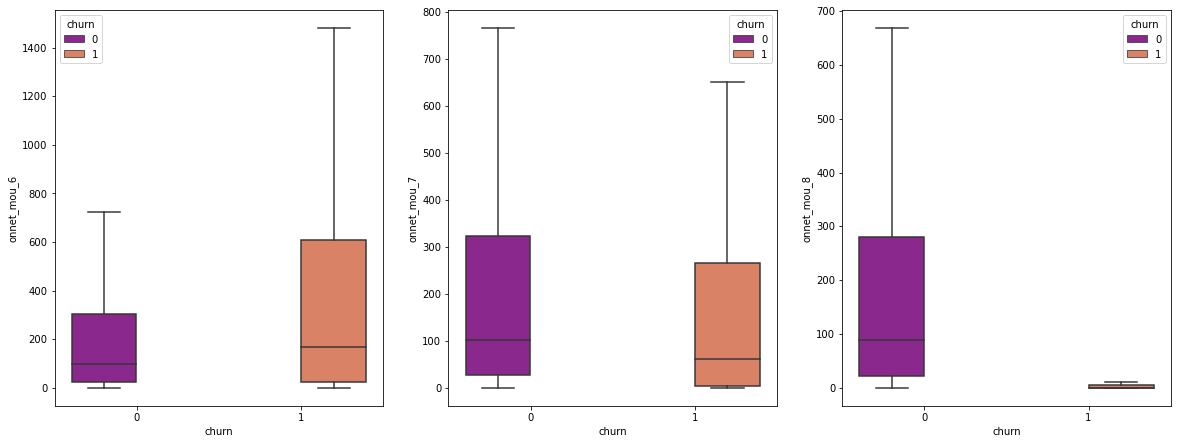

In [80]:
# Plotting offnet
plot_box_chart('onnet_mou')

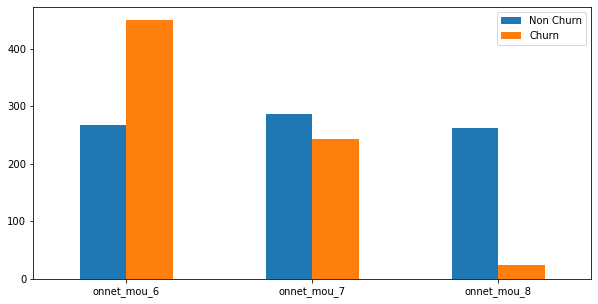

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,267.620306,286.692580,261.348319
Churn,449.545283,242.203644,23.864699


In [81]:
plot_mean_bar_chart(telecom_df_high_val_cust, onnet_usage_service)

##### Observations : We also see that there is a drop in Onnet usage in the 8th month for churned customers

## 8. Tenure Analysis for Customers 

In [82]:
tenure_data = telecom_df_high_val_cust.copy()

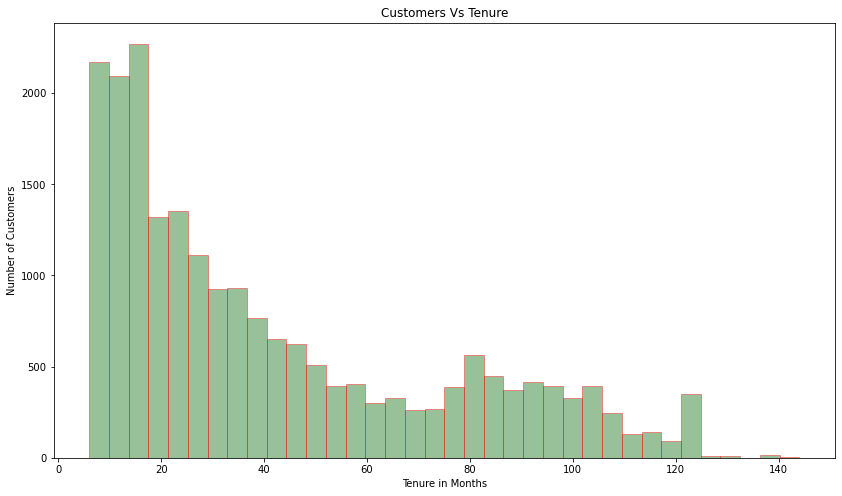

In [83]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [84]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

12    6-12 Months
15        1-2 Yrs
23        1-2 Yrs
24        2-5 Yrs
27        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

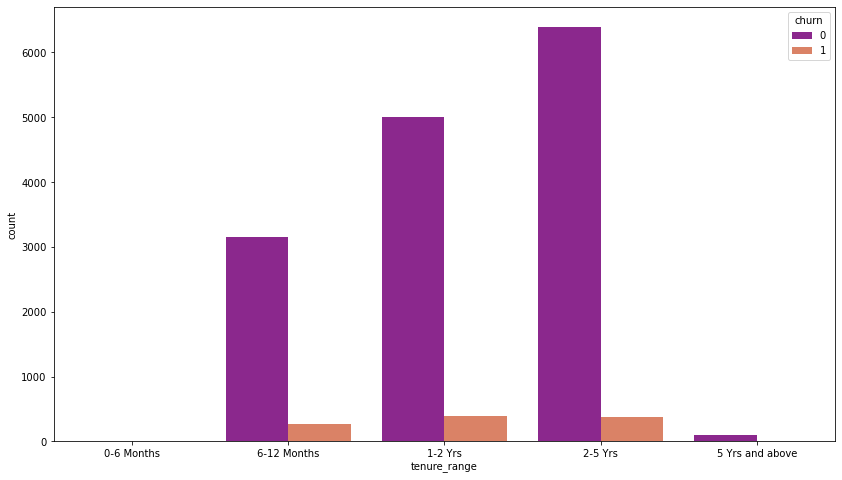

In [85]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("plasma"))
plt.show()

### Checking columns with more than 30% NA values.

In [86]:
100*telecom_df_high_val_cust.isnull().mean().sort_values(ascending=False)

count_rech_3g_8             51.725124
night_pck_user_8            51.725124
date_of_last_rech_data_8    51.725124
count_rech_2g_8             51.725124
fb_user_8                   51.725124
                              ...    
isd_og_mou_6                 0.000000
std_og_t2c_mou_8             0.000000
std_og_t2f_mou_8             0.000000
std_og_t2f_mou_7             0.000000
churn                        0.000000
Length: 139, dtype: float64

In [88]:
# making list of columns that have high missing values that we want to remove
rmcols=[]
for i in telecom_df_high_val_cust.columns:
    if(telecom_df_high_val_cust[i].isnull().mean()*100>=30.00):
        rmcols.append(i)
        
print("The Below Columns are removed from the Dataset :\n")
print(rmcols)

The Below Columns are removed from the Dataset :

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [89]:
telecom_df_high_val_cust.shape

(20984, 139)

In [90]:
# Removing these columns
telecom_df_high_val_cust.drop(rmcols,axis=1,inplace=True)
telecom_df_high_val_cust.shape# verifying the shape of the dataset

(20984, 128)

In [91]:
telecom_df_high_val_cust.drop(['max_rech_data_8'], axis=1,inplace=True)

In [92]:
telecom_df_high_val_cust.shape

(20984, 127)

In [93]:
numberic_col = [ 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [94]:
#Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis
for i in numberic_col:
    telecom_df_high_val_cust.loc[telecom_df_high_val_cust[i].isnull(),i]=0

In [95]:
100*telecom_df_high_val_cust.isnull().mean().sort_values(ascending=False)

og_others_8             3.678994
ic_others_8             3.678994
date_of_last_rech_8     1.906214
last_date_of_month_8    0.519443
date_of_last_rech_7     0.328822
                          ...   
std_og_t2f_mou_8        0.000000
std_og_t2f_mou_7        0.000000
std_og_t2f_mou_6        0.000000
std_og_t2m_mou_8        0.000000
churn                   0.000000
Length: 127, dtype: float64

## 8. Derive new features.

In [96]:
telecom_df_final = telecom_df_high_val_cust.copy()
print(telecom_df_final.shape)
telecom_df_final.head()

(20984, 127)


,id,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
12,12,2014-08-31,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,...,322,0.0,0.00,0.00,0,0.0,0.0,0.0,469.5,0
15,15,2014-08-31,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,...,602,0.0,0.00,0.00,0,155.0,0.0,155.0,604.5,0
23,23,2014-08-31,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,...,455,0.0,0.00,0.00,0,0.0,0.0,0.0,1205.0,0
24,24,2014-08-31,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,...,1219,0.0,0.00,0.00,0,24.0,48.0,24.0,469.5,0
27,27,2014-08-31,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,...,573,700.4,185.71,173.72,0,209.0,306.0,217.0,826.0,0


In [97]:
telecom_df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
telecom_df_final.drop(telecom_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (telecom_df_final.shape)

col_list = telecom_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    telecom_df_final[avg_col_name] = (telecom_df_final[col_6]  + telecom_df_final[col_7])/ 2

(20984, 122)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [98]:
col_list_to_drop = telecom_df_final.filter(regex='_6|_7')
telecom_df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (telecom_df_final.shape)

(20984, 83)


In [99]:
telecom_df_final.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
12,12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,...,77.0,77.0,130.21,0.00,0.5,0.0,0.0,0.0,0.000,77.5
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,...,23.0,34.5,0.02,0.00,0.0,1.5,0.0,0.0,0.000,36.0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,...,153.0,254.5,49.46,325.04,0.5,2.0,0.0,0.5,179.715,257.5


In [100]:
telecom_df_final.columns

Index(['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'churn_probability', 'total_rech_amt_data_8', 'churn',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_a

##### Observations : We have merged most of the columns related to month 6 & 7 so to reduce the number of features. By doing this apporach we have reduced the fetures from 124 to 84.

# Step 4 : Training the model

In [101]:
## PCA : Principal Component Analysis
!pip install imbalanced-learn==0.6.0
!pip install scikit-learn==0.22.1

  Using cached scikit-learn-0.22.1.tar.gz (6.9 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\abhijit\anaconda3\lib\site-packages\scikit_learn-1.0.2.dist-info\
   from C:\Users\ABHIJIT\anaconda3\Lib\site-packages\~cikit_learn-1.0.2.dist-info
  Moving to c:\users\abhijit\anaconda3\lib\site-packages\sklearn\
   from C:\Users\ABHIJIT\anaconda3\Lib\site-packages\~klearn


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ABHIJIT\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ABHIJIT\\AppData\\Local\\Temp\\pip-install-3d4huvu7\\scikit-learn_a7df0ab57ca04911b443040a38410219\\setup.py'"'"'; __file__='"'"'C:\\Users\\ABHIJIT\\AppData\\Local\\Temp\\pip-install-3d4huvu7\\scikit-learn_a7df0ab57ca04911b443040a38410219\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\ABHIJIT\AppData\Local\Temp\pip-wheel-1lijaq_3'
       cwd: C:\Users\ABHIJIT\AppData\Local\Temp\pip-install-3d4huvu7\scikit-learn_a7df0ab57ca04911b443040a38410219\
  Complete output (35 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils.

In [102]:

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_date(df):
    Y = df["churn"]
    X = df.drop(["churn"],axis=1)
    return X,Y
    
def scale_data(X):
    scaler = StandardScaler()
    X_col = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
    print("Scaling the data ....")
    return X_scale_final

def get_scree_plot(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

In [103]:
telecom_pca_df = telecom_df_final.copy()
telecom_pca_df.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
12,12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,...,77.0,77.0,130.21,0.00,0.5,0.0,0.0,0.0,0.000,77.5
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,...,23.0,34.5,0.02,0.00,0.0,1.5,0.0,0.0,0.000,36.0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,...,153.0,254.5,49.46,325.04,0.5,2.0,0.0,0.5,179.715,257.5


In [104]:
#Splitting in x and y
X,Y=split_date(telecom_pca_df)

In [105]:
X.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
12,12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,...,77.0,77.0,130.21,0.00,0.5,0.0,0.0,0.0,0.000,77.5
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,...,23.0,34.5,0.02,0.00,0.0,1.5,0.0,0.0,0.000,36.0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,...,153.0,254.5,49.46,325.04,0.5,2.0,0.0,0.5,179.715,257.5


In [106]:
Y.head(10)

12    0
15    0
23    0
24    0
27    0
33    0
39    0
45    0
49    0
52    0
Name: churn, dtype: int64

## Percentage distribution of churn/non-churn cutomer data

In [107]:
print("Percenatge of Churned Customer data : "+str(round(100*Y.sum()/len(Y),2)))

Percenatge of Churned Customer data : 5.47


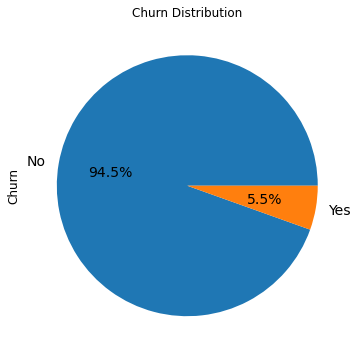

In [108]:
#Churn Distribution
pie_chart = telecom_pca_df['churn'].value_counts()*100.0 /len(telecom_pca_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

## Scaling the data so as to normalize all the fields

In [109]:
X_scaled = scale_data(X)
print(X_scaled.shape)
X_scaled.head(5)

Scaling the data ....
(20984, 82)


,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-1.741335,-0.254323,-0.437773,0.614531,-0.167619,-0.190201,-0.328977,-0.463071,-0.319299,-0.235883,...,-0.734751,-0.679548,-0.376848,-0.401420,-0.463536,-0.368311,-0.393106,-0.207546,-0.413242,-0.682782
1,-1.741186,-0.358685,-0.114965,-0.326099,-0.167619,-0.190201,0.476813,0.126022,-0.065164,-0.235883,...,-0.000637,-0.263219,0.068408,-0.401420,0.820536,-0.368311,-0.393106,-0.207546,-0.413242,-0.266345
2,-1.740788,-0.083930,-0.527486,0.073039,-0.167619,-0.190201,-0.342050,0.966652,0.137527,-0.235883,...,-0.734751,-0.679548,-0.376848,-0.401420,-0.463536,-0.368311,-0.393106,-0.207546,-0.413242,-0.682782
3,-1.740739,-0.548691,-0.465738,-0.273658,-0.167619,-0.190201,-0.219479,-0.250343,-0.319299,-0.184745,...,-0.515470,-0.493011,-0.376780,-0.401420,-0.463536,0.329829,-0.393106,-0.207546,-0.413242,-0.489341
4,-1.740590,-0.197467,-0.502356,-0.356084,-0.167619,-0.190201,-0.292167,0.000669,0.997164,-0.235883,...,0.723943,0.696500,-0.207719,-0.024537,0.820536,0.562542,-0.393106,0.332660,0.043126,0.700864


In [110]:
#replacing nan with 0
X_scaled=X_scaled.replace(np.nan,0)

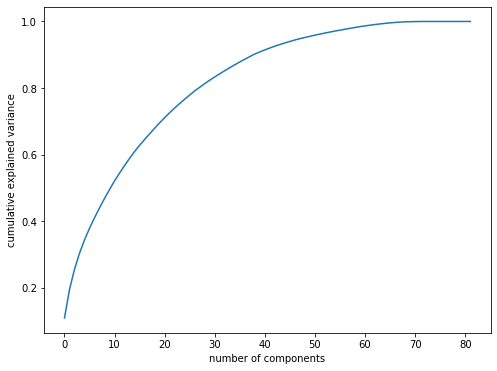

,PC1,PC2,PC3,Feature
0,0.003295,0.003640,-0.005005,id
1,0.049261,0.319631,0.113330,arpu_8
2,-0.082087,0.138639,0.149792,onnet_mou_8
3,-0.067617,0.229695,0.075803,offnet_mou_8
4,0.000553,0.043895,0.004392,roam_ic_mou_8


In [111]:
pca = get_scree_plot(X_scaled) # scree plot

col = list(X_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head()

In [112]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.93,  19.47,  25.59,  30.38,  34.42,  37.86,  41.04,  44.02,
        46.85,  49.52,  52.13,  54.47,  56.74,  58.88,  60.96,  62.81,
        64.55,  66.27,  67.93,  69.57,  71.1 ,  72.61,  74.  ,  75.37,
        76.67,  77.92,  79.15,  80.25,  81.34,  82.36,  83.35,  84.29,
        85.22,  86.13,  87.  ,  87.85,  88.67,  89.47,  90.24,  90.88,
        91.48,  92.05,  92.6 ,  93.09,  93.57,  94.02,  94.46,  94.85,
        95.21,  95.56,  95.91,  96.23,  96.54,  96.84,  97.14,  97.41,
        97.68,  97.95,  98.21,  98.47,  98.7 ,  98.9 ,  99.1 ,  99.28,
        99.45,  99.6 ,  99.72,  99.82,  99.92,  99.96, 100.  , 100.02,
       100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03,
       100.03, 100.03])

#### Observation : Looks like 60 components are enough to describe 95% of the variance in the dataset.We'll choose **60** components for our modeling

# Step 5 : Model Prediction and Evaluation

In [113]:
test_data=pd.read_csv("test.csv")

In [114]:
test_data.shape

(30000, 171)

In [115]:
telecom_pca_df.shape

(20984, 83)

In [116]:
x_train=X
y_train=Y

In [117]:
X.columns

Index(['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'churn_probability', 'total_rech_amt_data_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'av

In [118]:
test_data['total_rech_data_6'] = test_data['total_rech_data_6'].replace(np.NaN,0.0)
test_data['total_rech_data_7'] = test_data['total_rech_data_7'].replace(np.NaN,0.0)
test_data['total_rech_data_8'] = test_data['total_rech_data_8'].replace(np.NaN,0.0)
test_data['av_rech_amt_data_6'] = test_data['av_rech_amt_data_6'].replace(np.NaN,0.0)
test_data['av_rech_amt_data_7'] = test_data['av_rech_amt_data_7'].replace(np.NaN,0.0)
test_data['av_rech_amt_data_8'] = test_data['av_rech_amt_data_8'].replace(np.NaN,0.0)
# let's adding new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
test_data['total_rech_amt_data_6'] = test_data.av_rech_amt_data_6 + df_telecom_train.total_rech_data_6
test_data['total_rech_amt_data_7'] = test_data.av_rech_amt_data_7 + df_telecom_train.total_rech_data_7
test_data['total_rech_amt_data_8'] = test_data.av_rech_amt_data_8 + df_telecom_train.total_rech_data_8
test_data['total_avg_rech_amnt_6_7_GPhase'] = (test_data.total_rech_amt_6 + test_data.total_rech_amt_data_6 \
                                               + test_data.total_rech_amt_7+ test_data.total_rech_amt_data_7)/2

In [119]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 175 entries, id to total_avg_rech_amnt_6_7_GPhase
dtypes: float64(139), int64(27), object(9)
memory usage: 40.1+ MB


In [120]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = test_data.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)
test_data_high_val_cust = test_data

In [121]:
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7',
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7']

print("Features before dropping unique values : "+ str(test_data_high_val_cust.shape[1]))
test_data_high_val_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)
print("Features after dropping unique values : "+ str(test_data_high_val_cust.shape[1]))

Features before dropping unique values : 175
Features after dropping unique values : 165


In [122]:
test_data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 165 entries, id to total_avg_rech_amnt_6_7_GPhase
dtypes: float64(132), int64(26), object(7)
memory usage: 37.8+ MB


In [123]:
for col in df_DateCols:
    test_data_high_val_cust[col] = pd.to_datetime(test_data_high_val_cust[col])
test_data_high_val_cust.head()

,id,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase
0,69999,2014-08-31,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,...,NaN,NaN,1692,0.00,0.00,0.00,0.0,0.0,0.0,96.5
1,70000,2014-08-31,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,...,NaN,NaN,2533,0.00,0.00,0.00,0.0,1.0,0.0,500.5
2,70001,2014-08-31,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,...,NaN,NaN,277,525.61,758.41,241.84,0.0,0.0,0.0,750.0
3,70002,2014-08-31,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,...,NaN,NaN,1244,0.00,0.00,0.00,0.0,0.0,0.0,185.0
4,70003,2014-08-31,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,...,NaN,NaN,462,0.00,0.00,0.00,7.0,7.0,6.0,430.0


In [124]:
#list_potential_categorical_type(get_meta_data(test_data_high_val_cust),test_data_high_val_cust)
test_data_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()
#Getting the last day recharge amount columns
last_day_rech_amt = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('day')]
last_day_rech_amt.tolist()
usage_2g_and_3g = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('2g|3g',regex=True)]
usage_2g_and_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

In [125]:
# let's check Volume based cost 
vbc_column =test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()
# Renaming month named vbc columns to 6,7,8,9 format
test_data_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

vbc_column = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [126]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
# Checking columns for average revenue per user
arpu_cols = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('arpu_')]
mou_cols = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('mou')]
test_data_high_val_cust.loc[:,mou_cols] = test_data_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)
mou_og_cols6 = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [127]:
list_total_og_cols = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
test_data_high_val_cust.drop(list_total_og_cols,axis=1,inplace=True)
#log("Columns dropped - ")
list_total_og_cols.tolist()
mou_ic_cols6 = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
test_data_high_val_cust.loc[:,mou_ic_cols6].describe()
list_total_ic_cols = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
test_data_high_val_cust.drop(list_total_ic_cols,axis=1,inplace=True)
#log("Columns dropped - ")
list_total_ic_cols.tolist()
offnet_usage_service_col = test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]
#minutes of usage related columns
onnet_usage_service =test_data_high_val_cust.columns[test_data_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

In [128]:
test_data_high_val_cust.shape

(30000, 147)

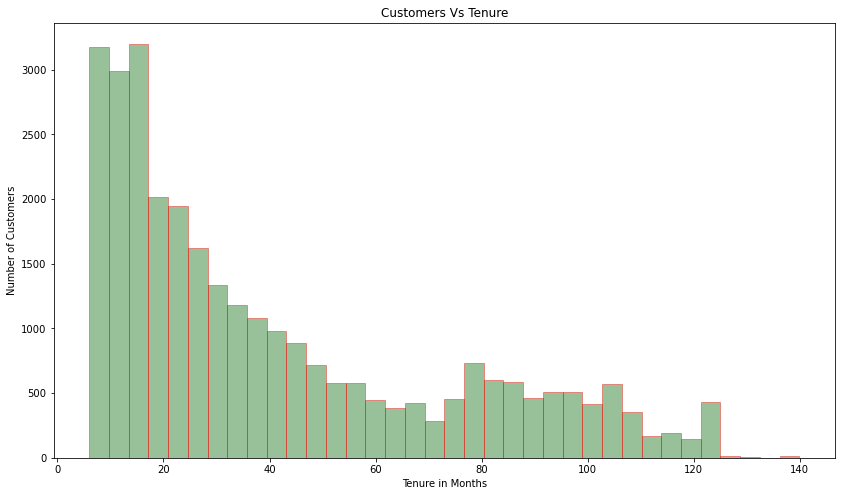

(30000, 147)
(30000, 139)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
total_rech_amt_data


In [129]:
tenure_data = test_data_high_val_cust.copy()
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

numberic_col = [ 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

test_data_final = test_data_high_val_cust.copy()
print(test_data_final.shape)
test_data_final.head(3)
test_data_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
test_data_final.drop(test_data_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (test_data_final.shape)

col_list = test_data_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    test_data_final[avg_col_name] = (test_data_final[col_6]  + test_data_final[col_7])/ 2

In [130]:
test_x=test_data_final[['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'total_rech_amt_data_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'avg_loc_og_t2m_mou_av67',
       'avg_loc_og_t2f_mou_av67', 'avg_loc_og_t2c_mou_av67',
       'avg_std_og_t2t_mou_av67', 'avg_std_og_t2m_mou_av67',
       'avg_std_og_t2f_mou_av67', 'avg_isd_og_mou_av67', 'avg_spl_og_mou_av67',
       'avg_og_others_av67', 'avg_loc_ic_t2t_mou_av67',
       'avg_loc_ic_t2m_mou_av67', 'avg_loc_ic_t2f_mou_av67',
       'avg_std_ic_t2t_mou_av67', 'avg_std_ic_t2m_mou_av67',
       'avg_std_ic_t2f_mou_av67', 'avg_spl_ic_mou_av67', 'avg_isd_ic_mou_av67',
       'avg_ic_others_av67', 'avg_total_rech_num_av67',
       'avg_total_rech_amt_av67', 'avg_max_rech_amt_av67',
       'avg_last_day_rch_amt_av67', 'avg_total_rech_data_av67',
       'avg_max_rech_data_av67', 'avg_av_rech_amt_data_av67',
       'avg_vol_2g_mb_av67', 'avg_vol_3g_mb_av67', 'avg_monthly_2g_av67',
       'avg_sachet_2g_av67', 'avg_monthly_3g_av67', 'avg_sachet_3g_av67',
       'avg_vbc_3g_av67', 'avg_total_rech_amt_data_av67']]

In [131]:
test_x.shape

(30000, 81)

In [132]:
X.columns

Index(['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'churn_probability', 'total_rech_amt_data_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'av

In [133]:
X=X.replace(np.nan,0)

In [134]:
x_train=X
y_train=Y
x_test=test_x

In [135]:
x_train.shape

(20984, 82)

In [136]:
x_test.shape

(30000, 81)

In [137]:
X_train=x_train.drop(['churn_probability'],axis=1)

In [138]:
y_train.head()

12    0
15    0
23    0
24    0
27    0
Name: churn, dtype: int64

In [139]:
y_train.shape

(20984,)

# Tree Model Regression 

In [140]:
telecom_tree_df = telecom_df_final.copy()

In [141]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [142]:
rfc = RandomForestClassifier()

In [143]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [144]:
x_test=x_test.replace(np.nan,0)

In [145]:
x_test.shape

(30000, 81)

In [146]:
# Making predictions
predictions = rfc.predict(x_test)

In [147]:
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

#### Observation : So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

## Hyperparameter Tuning

In [148]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(16,5))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="training accuracy")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="test accuracy")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## Tuning max_depth
Let's try to find the optimum values for 'max_depth' and understand how the value of max_depth impacts the overall accuracy of the ensemble.

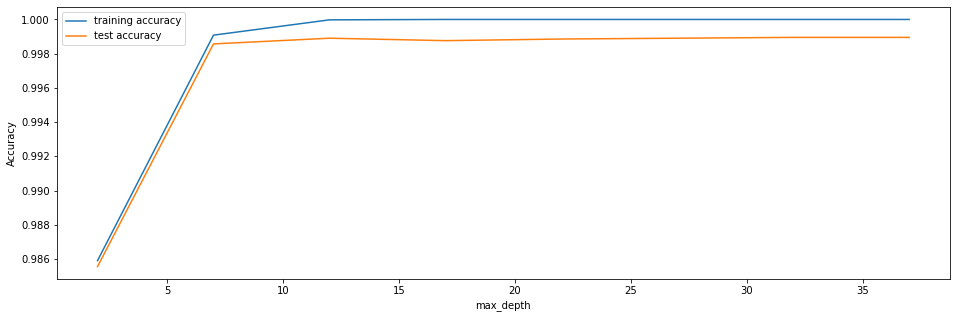

In [149]:
# parameters to build the model on
parameters = {'max_depth': range(2, 40, 5)}
tune_hyperparameter(parameters,x_train,y_train)

#### Observation :
- We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score becomme stagnant. 
- The ensemble tries to overfit as we increase the max_depth. Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.
- **7 and 12** value have peek convergens and can be used for grid veiw search.

## Tuning n_estimators
- Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

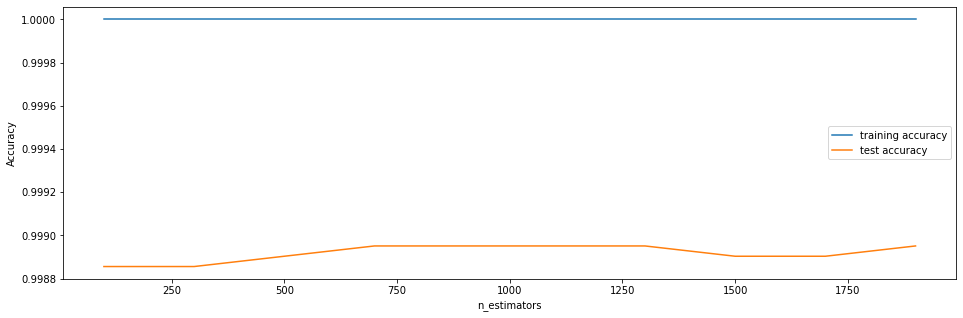

In [150]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 2000, 200)}
tune_hyperparameter(parameters,x_train,y_train)

#### Observation :
- Score almost remain the same with very low dip throught the range. We will use **200** for grid view search.

## Tuning max_features
- Let's see how the model performance varies with 'max_features', which is the maximum numbre of features considered for splitting at a node.

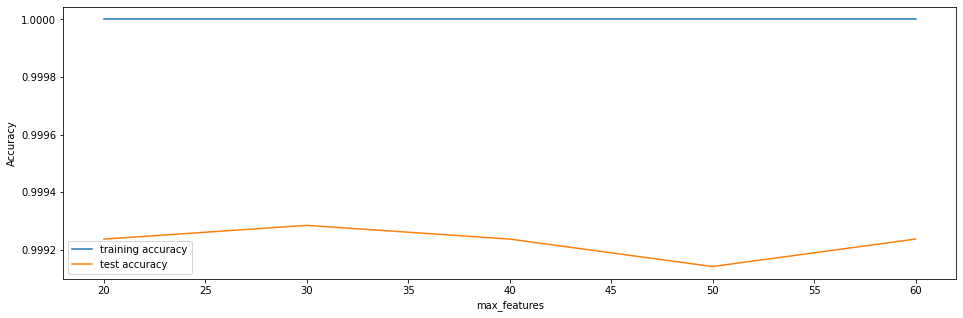

In [151]:
# parameters to build the model on
parameters = {'max_features': [20,30,40,50,60]}
tune_hyperparameter(parameters,x_train,y_train,4)

#### Observation :
- Apparently, accuracy of training seems to be stable and test scores seems to increase till **40** and then decrease. Again we see increase on **60** and we will use that.

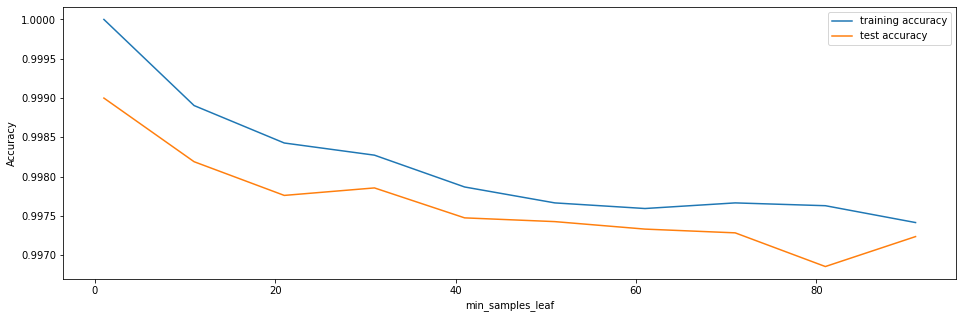

In [152]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 100, 10)}
tune_hyperparameter(parameters,x_train,y_train)

#### Observation :
- We can see that the model starts to overfit as value is decrease the value of min_samples_leaf. **10 to 20** seems to be a good range and that will be used in grid search.

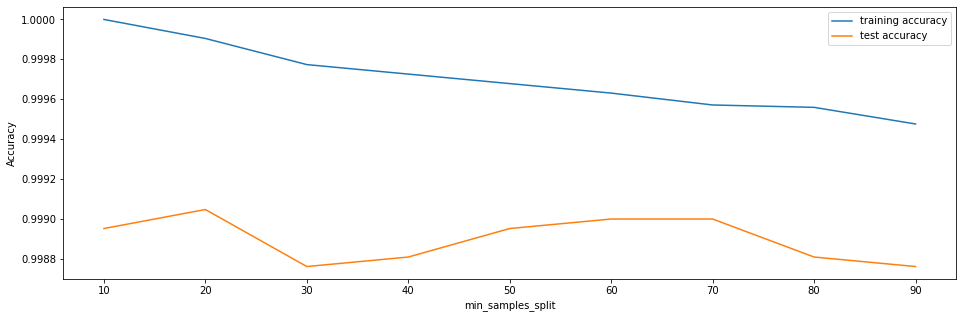

In [153]:
# parameters to build the model on
parameters = {'min_samples_split': range(10, 100, 10)}
tune_hyperparameter(parameters,x_train,y_train)

#### Observation :
- Range **10 to 30** is optimal with good accuracy. 

## Grid Search to Find Optimal Hyperparameters

In [154]:
#We can now find the optimal hyperparameters using GridSearchCV.
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [7,12],
    'n_estimators': [200],
    'max_features': [40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [155]:
# Fit the grid search to the data
rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 12], 'max_features': [40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [200]},
             return_train_score=True, verbose=1)

In [156]:
#printing the optimal accuracy score and hyperparameters
print('We can get accuracy of '+str(round(rf_grid_search.best_score_,2))+' using '+str(rf_grid_search.best_params_))

We can get accuracy of 1.0 using {'max_depth': 7, 'max_features': 40, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 200}


In [157]:
print("Max accuracy with Random Forest classifier - "+str(round(rf_grid_search.best_score_,2)))

Max accuracy with Random Forest classifier - 1.0


## Building and Evaluating the Final Model for Random Forest
- Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [158]:
rfc = RandomForestClassifier(max_depth=12,
                             max_features=40,
                             min_samples_leaf=10,
                             min_samples_split=10,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features=40, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1)

In [172]:
# Making predictions
predictions = rfc.predict(x_test)

In [173]:
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [174]:
solution_data=pd.DataFrame(predictions,index=test_data['id'],columns=['churn_probability'])

In [175]:
#solution_data=solution_data.reset_index()

In [176]:
type(solution_data)

pandas.core.frame.DataFrame

In [177]:
solution_data

,churn_probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0
...,...
99994,0
99995,0
99996,0


In [178]:
solution_data.to_csv("Submission.csv")

# Step 6 :  Recommandations

- Less number of high value customer are churing but for last 6 month no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.

- Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.
- Average revenue per useseems to be most important feature in determining churn prediction. 
- **Incoming** and **Outgoing Calls** on **romaing** for 8th month are strong indicators of churn behaviour
- **Local Outgoing calls** made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.
- Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.